# 提升方法(boosting)

提升方法是一种常见的统计学习方法

### AdaBoost算法

假设给定一个二分类的训练数据集：$T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$,其中每个样本点均由实例与标记组成，且$x_i \in \mathcal{X} \subseteq \mathcal{R}^{n}$,标记$y_i \in \mathcal{Y}=\{-1,+1\}$,$\mathcal{X}$为实例空间，$\mathcal{Y}$为标记集合。

AdaBoost可以从训练集中学习一系列弱分类器或基本分类器，并将这些弱分类器线性组合成为一个强分类器。

### AdaBoost算法

输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$,其中，$x_i \in \mathcal{X} \subseteq \mathcal{R}^{n}$,标记$y_i \in \mathcal{Y}=\{-1,+1\}$；弱分类器；

输出：最终分类器$G(x)$  

第一步：初始化训练数据的权值分布
$$D_1=(w_{11},\cdots,w_{1i},\cdots,w_{1N}),w_{1i}=\frac{1}{N},i=1,2,\cdots,N$$

<font color=red>
要对数据集进行假设，假设训练集是具有均匀的权值分布，即每个样本在基本分类器的学习所起的作用相同，有了该假设，才保证第一步在原始数据上学习基本分类器$G_1(x)$
</font>

第二步：对$m=1,2,\cdots,M$

$\quad (a)$.使用具有权值分布$D_m$的训练集学习，得到基本分类器：

$$G_m(x):\mathcal{X}\rightarrow \{-1,+1\}$$

$\quad (b)$.计算$G_m(x)$在训练集上的分类误差：

$$e_m=\sum_{i=1}^{N}P(G_m(x_i) \not =y_i)=\sum_{i=1}^{N}w_{mi}I(G_{m}(x_i)\not = y_i)$$

$\quad (c)$.计算$G_m(x)$的系数：
$$\alpha_{m}=\frac{1}{2}\log \frac{1-e_m}{e_m}$$
$\quad 注$这里的对数是自然对数。

$\quad (d)$更新训练集的权值分布

$$D_{m+1}=(w_{m+1,1},\cdots,w_{w+1,i},\cdots,w_{m+1,N})$$

$$w_{m+1,i}=\frac{w_{mi}}{Z_m}\exp(-\alpha_{m}y_{i}G_{m}(x_i)),\quad i=1,2,\cdots,N$$
$\quad $其中$Z_m$是规范化因子,有了这个规范化因子，$D_{m+1}$则成为一个概率分布。
$$Z_m=\sum_{i=1}^{N}w_{mi}\exp(-\alpha_{m}y_{i}G_{m}(x_i))$$

<font color=red>
上述第二步的详细解析：AdaBoost算法反复学习基本分类器，在每一轮$m=1,2,\cdots,M$按顺序依次执行下列操作：  
    
$\quad(a)$使用当前分布$D_m$加权对的训练集，学习基本分类器$G_m(x)$.  

$\quad(b)$计算基本分类器$G_m(x)$在加权训练集上的分类误差率：
$$e_m=\sum_{i=1}P(G_m(x_i)\not = y_i)=\sum_{G_{m}\left(x_i\right) \not = y_i}w_{mi}$$
$\quad $其中，$w_{mi}$表示第$m$轮中第$i$个实例的权值，$\sum_{i=1}^{N}w_{mi}=1$.
上式说明$G_m(x)$在加权的训练集上的分类误差率是被$G_{m}(x)$误分类样本的权值之和。  

$\quad(c)$计算基本分类器$G_{m}(x)$的系数$\alpha_{m}$。$\alpha_{m}$表示$G_{m}(x)$在最终分类器中的重要性，当$e_{m} \leqslant \frac{1}{2}$时，$\alpha_{m}\geqslant 0$,且$\alpha_{m}$随着$e_m$的减小而增大，所以分类误差率越小的基本分类器在最终分类器中的作用越大。  

$\quad(d)$更新训练数据的权值分布，为下一轮训练做准备。
$$w_{m+1,i}=\begin{cases}{\frac{w_{mi}}{Z_{m}}e^{-\alpha_{m}}},\quad G_m(x_i)=y_i \\ {\frac{w_{mi}}{Z_m}e^{\alpha_{m}}, \quad G_m(x_i) \not =y_i}\end{cases}$$

</font>

第三步：构建基本分类器的线性组合$f(x)=\sum_{m=1}^{M}\alpha_{m}G_{m}(x)$,然后得到最终分类器:
$$G(x)=\operatorname{sign}(f(x))=\operatorname{sign}\left(\sum_{m=1}^{M}\alpha_{m}G_{m}(x)\right)$$

<font color=red>
上述步骤是线性组合$f(x)$实现$M$个基本分类器的加权表决。系数$\alpha_{m}$表示了基本分类器$G_{m}(x)$的重要性，$f(x)$的符号决定实例$x$的类别,$f(x)$的绝对值表示分类的确信度。
    </font>

In [1]:
from __future__ import print_function
from numpy import *

#加载文件并解析数据
def loadDataSet(fileName):
    # get number of fields
    numFeat = len(open(fileName).readline().split('\t'))
    dataArr = []
    labelArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat-1):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        labelArr.append(float(curLine[-1]))
    return dataArr, labelArr


def stumpClassify(dataMat, dimen, threshVal, threshIneq):
    """stumpClassify(将数据集，按照feature列的value进行 二分法切分比较来赋值分类)
    Args:
        dataMat    Matrix数据集
        dimen      特征列
        threshVal  特征列要比较的值
    Returns:
        retArray 结果集
    """
    # 默认都是1
    retArray = ones((shape(dataMat)[0], 1))
    # dataMat[:, dimen] 表示数据集中第dimen列的所有值
    # threshIneq == 'lt'表示修改左边的值，gt表示修改右边的值
    if threshIneq == 'lt':
        retArray[dataMat[:, dimen] <= threshVal] = -1.0
    else:
        retArray[dataMat[:, dimen] > threshVal] = -1.0
    return retArray


def buildStump(dataArr, labelArr, D):
    """buildStump(得到决策树的模型)
    Args:
        dataArr   特征标签集合
        labelArr  分类标签集合
        D         最初的样本的所有特征权重集合
    Returns:
        bestStump    最优的分类器模型
        minError     错误率
        bestClasEst  训练后的结果集
    """
    # 转换数据
    dataMat = mat(dataArr)
    labelMat = mat(labelArr).T
    # m行 n列
    m, n = shape(dataMat)

    # 初始化数据
    numSteps = 10.0
    bestStump = {}
    bestClasEst = mat(zeros((m, 1)))
    # 初始化的最小误差为无穷大
    minError = inf

    # 循环所有的feature列，将列切分成 若干份，每一段以最左边的点作为分类节点
    for i in range(n):
        rangeMin = dataMat[:, i].min()
        rangeMax = dataMat[:, i].max()
        # print 'rangeMin=%s, rangeMax=%s' % (rangeMin, rangeMax)
        # 计算每一份的元素个数
        stepSize = (rangeMax-rangeMin)/numSteps
        # 例如： 4=(10-1)/2   那么  1-4(-1次)   1(0次)  1+1*4(1次)   1+2*4(2次)
        # 所以： 循环 -1/0/1/2
        for j in range(-1, int(numSteps)+1):
            # go over less than and greater than
            for inequal in ['lt', 'gt']:
                # 如果是-1，那么得到rangeMin-stepSize; 如果是numSteps，那么得到rangeMax
                threshVal = (rangeMin + float(j) * stepSize)
                # 对单层决策树进行简单分类，得到预测的分类值
                predictedVals = stumpClassify(dataMat, i, threshVal, inequal)
                # print predictedVals
                errArr = mat(ones((m, 1)))
                # 正确为0，错误为1
                errArr[predictedVals == labelMat] = 0
                # 计算 平均每个特征的概率0.2*错误概率的总和为多少，就知道错误率多高
                # 例如： 一个都没错，那么错误率= 0.2*0=0 ， 5个都错，那么错误率= 0.2*5=1， 只错3个，那么错误率= 0.2*3=0.6
                weightedError = D.T*errArr
                '''
                dim            表示 feature列
                threshVal      表示树的分界值
                inequal        表示计算树左右颠倒的错误率的情况
                weightedError  表示整体结果的错误率
                bestClasEst    预测的最优结果
                '''
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal

    # bestStump 表示分类器的结果，在第几个列上，用大于／小于比较，阈值是多少
    return bestStump, minError, bestClasEst


def adaBoostTrainDS(dataArr, labelArr, numIt=40):
    """adaBoostTrainDS(adaBoost训练过程放大)
    Args:
        dataArr   特征标签集合
        labelArr  分类标签集合
        numIt     实例数
    Returns:
        weakClassArr  弱分类器的集合
        aggClassEst   预测的分类结果值
    """
    weakClassArr = []
    m = shape(dataArr)[0]
    # 初始化 D，设置每行数据的样本的所有特征权重集合，平均分为m份
    D = mat(ones((m, 1))/m)
    aggClassEst = mat(zeros((m, 1)))
    for i in range(numIt):
        # 得到决策树的模型
        bestStump, error, classEst = buildStump(dataArr, labelArr, D)

        # alpha 目的主要是计算每一个分类器实例的权重(加和就是分类结果)
        # 计算每个分类器的 alpha 权重值
        alpha = float(0.5*log((1.0-error)/max(error, 1e-16)))
        bestStump['alpha'] = alpha
        # store Stump Params in Array
        weakClassArr.append(bestStump)

        # print "alpha=%s, classEst=%s, bestStump=%s, error=%s " % (alpha, classEst.T, bestStump, error)
        # 分类正确：乘积为1，不会影响结果，-1主要是下面求e的-alpha次方
        # 分类错误：乘积为 -1，结果会受影响，所以也乘以 -1
        expon = multiply(-1*alpha*mat(labelArr).T, classEst)
        # 判断正确的，就乘以-1，否则就乘以1， 为什么？ 书上的公式。
        # print '(-1取反)预测值expon=', expon.T
        # 计算e的expon次方，然后计算得到一个综合的概率的值
        # 结果发现： 判断错误的样本，D对于的样本权重值会变大。
        D = multiply(D, exp(expon))
        D = D/D.sum()
        # print "D: ", D.T
        # print '\n'

        # 预测的分类结果值，在上一轮结果的基础上，进行加和操作
        aggClassEst += alpha*classEst
        # print "叠加后的分类结果aggClassEst: ", aggClassEst.T
        # sign 判断正为1， 0为0， 负为-1，通过最终加和的权重值，判断符号。
        # 结果为：错误的样本标签集合，因为是 !=,那么结果就是0 正, 1 负
        aggErrors = multiply(sign(aggClassEst) != mat(labelArr).T, ones((m, 1)))
        errorRate = aggErrors.sum()/m
        if errorRate == 0.0:
            break
    return weakClassArr, aggClassEst


def adaClassify(datToClass, classifierArr):
    dataMat = mat(datToClass)
    m = shape(dataMat)[0]
    aggClassEst = mat(zeros((m, 1)))

    # 循环 多个分类器
    for i in range(len(classifierArr)):
        # 前提： 我们已经知道了最佳的分类器的实例
        # 通过分类器来核算每一次的分类结果，然后通过alpha*每一次的结果 得到最后的权重加和的值。
        classEst = stumpClassify(dataMat, classifierArr[i]['dim'], classifierArr[i]['thresh'], classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
    return sign(aggClassEst)

import matplotlib.pyplot as plt
def plotROC(predStrengths, classLabels):
    """plotROC(打印ROC曲线，并计算AUC的面积大小)
    Args:
        predStrengths  最终预测结果的权重值
        classLabels    原始数据的分类结果集
    """
    
    # 计算AUC
    ySum = 0.0
    # 对正样本的进行求和
    numPosClas = sum(array(classLabels)==1.0)
    # 正样本的概率
    yStep = 1/float(numPosClas)
    # 负样本的概率
    xStep = 1/float(len(classLabels)-numPosClas)
    # argsort函数返回的是数组值从小到大的索引值
    # get sorted index, it's reverse
    sortedIndicies = predStrengths.argsort()
    
    # 开始创建模版对象
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    # cursor光标值
    cur = (1.0, 1.0)
    # 循环并绘制所有点
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0
            delY = yStep
        else:
            delX = xStep
            delY = 0
            ySum += cur[1]
        # draw line from cur to (cur[0]-delX, cur[1]-delY)
        # 画点连线 (x1, x2, y1, y2)
        if index<10:
            print(cur[0], cur[0]-delX, cur[1], cur[1]-delY)
        ax.plot([cur[0], cur[0]-delX], [cur[1], cur[1]-delY], c='b')
        cur = (cur[0]-delX, cur[1]-delY)
    # 画对角的虚线线
    ax.plot([0, 1], [0, 1], 'b--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for AdaBoost horse colic detection system')
    # 设置画图的范围区间 (x1, x2, y1, y2)
    ax.axis([0, 1, 0, 1])
    plt.show()
    '''
    参考说明：http://blog.csdn.net/wenyusuran/article/details/39056013
    为了计算 AUC ，我们需要对多个小矩形的面积进行累加。
    这些小矩形的宽度是xStep，因此可以先对所有矩形的高度进行累加，最后再乘以xStep得到其总面积。
    所有高度的和(ySum)随着x轴的每次移动而渐次增加。
    '''
    print("曲线之下的面积: ", ySum*xStep)


0.6033057851239683 0.5950413223140509 0.9775280898876404 0.9775280898876404
0.44628099173553903 0.4380165289256217 0.9269662921348313 0.9269662921348313
0.42148760330578705 0.4132231404958697 0.9157303370786515 0.9157303370786515
0.4132231404958697 0.4049586776859524 0.8932584269662919 0.8932584269662919
0.09090909090909338 0.08264462809917603 0.6797752808988756 0.6797752808988756
0.049586776859506604 0.04132231404958925 0.6179775280898867 0.6179775280898867
0.024793388429754537 0.024793388429754537 0.544943820224718 0.5393258426966281
0.01652892561983718 0.01652892561983718 0.5056179775280887 0.4999999999999988
0.008264462809919826 0.008264462809919826 0.35955056179775124 0.35393258426966134
2.4702462297909733e-15 2.4702462297909733e-15 0.32584269662921184 0.32022471910112194


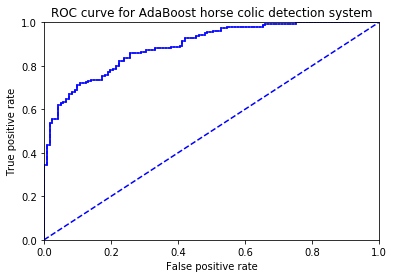

曲线之下的面积:  0.8918191104095092


In [2]:
# 马疝病数据集
# 训练集合
dataArr, labelArr = loadDataSet("../data/horseColicTraining2.txt")
weakClassArr, aggClassEst = adaBoostTrainDS(dataArr, labelArr, 40)
# 计算ROC下面的AUC的面积大小
plotROC(aggClassEst.T, labelArr)

In [3]:
# 测试集合
dataArrTest, labelArrTest = loadDataSet("../data/horseColicTest2.txt")
m = shape(dataArrTest)[0]
predicting10 = adaClassify(dataArrTest, weakClassArr)
errArr = mat(ones((m, 1)))
# 测试：计算总样本数，错误样本数，错误率
print(m, errArr[predicting10 != mat(labelArrTest).T].sum(), errArr[predicting10 != mat(labelArrTest).T].sum()/m)

67 13.0 0.19402985074626866


**上述案例均已通过**

----
参考资料：  
《统计学习方法》  
ApacheCN之AiLearning

整理制作：深度学习学研社

<div>
<table align="left" border="1" bordercolor="#000000">
    <div>
    <tr>
        <td>
            微信公众号：ID: AI_class_vip<br>
            <img src="../image/gongzhonghao.jpg" width="150" height="150" align="left"/>    
        </td>
    </tr>
    </div>
    <div>
    <tr>
        <td>
        知识星球：机器学习交流学习圈：<br>
    <img src="../image/dlzhishixingqiu.jpg" width="150" height="150" align="left"/>  
        </td>
    </tr>
        </div>
    <div>
     <tr>
        <td>
        配置环境：python 3.4+  
        </td>
    </tr>
        </div>
</table>
</div>
